# **파이썬데이터분석[02]**

**16조 - 202104263 윤혜정 202104277 이성민**


2023년도 축제 혼잡도 예상

**1차 주제/데이터**

-> 지역축제 개최에 따른 서울시 공영주차장 혼잡도를 바탕으로 2023년도 지역축제 개최 계획에 맞춰 축제 혼잡도 예상

(2022년도 지역축제 개최 현황 & 2023년도 지역축제 개최 계획 & 서울시설공단_공영주차장 일별 주차현황)

**2차 주제/데이터**

-> 2022년도 지역축제 개최계획에 따른 서울시 전철역 이용객수를 바탕으로 2023년도에 개최될 서울시 축제 혼잡도 예상

(2022년도 지역축제 개최 현황 & 2023년도 지역축제 개최 계획 & 2022 서울교통공사 역/일/시간대별 승하차 인원 정보)

**`3차 주제/데이터`**
 
 올해 개최 예정인 서울 축제 여러 개와 각 개최지 근처의 전철역 1군데 선정해서 데이터 분석 예정
 -> 2022년에 가장 많은 인원이 방문한 22023년 미개최 축제 하나를 선정하여 근처 전철역 여러 군데를 비교&분석


---


> 데이터 변경 이유

지역축제 개최시, 축제 방문객들 대다수가 주차장을 사용하는 자가용보다 대중교통을 사용할 것이라고 예상함으로 공영주차장 주차 현황보다 전철역 승하차 인원을 분석하는 것이 더 적합하다고 판단했음.

 또한 올해 개최 예정인 서울 축제 전부를 분석하려고 하였지만, 명확하지 않은 정보가 많아 미개최 축제 중 작년 방문객수가 가장 많았던 축제를 선정해 집중적으로 구체적인 분석을 하는 것이 더 낫다고 판단했음.

In [ ]:
import pandas as pd
import numpy as np


1. 데이터 수집

In [ ]:
# 2023 개최 예정 축제 중 주요 분석 축제 선정

festival2023 = pd.read_csv('festival2023.csv')
festival2023

,2023년 지역축제 개최 계획,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,연번,광역\n단체명,기초\n단체명,축제명,축제유형,개최기간,개최장소,개최방식,최초\n개최년도(년),예산(백만원),...,방문객수(前년),NaN,전담조직(축제사무국),NaN,NaN,국비지원\n부처명,담당자,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,국비,...,내국인(명),외국인(명),전담조직명,조직형태,설립근거,NaN,성명,연락처,NaN,NaN
4,1,서울,-,서울뮤직페스티벌,문화예술,10.20~10.22,난지한강공원,혼합형,2019,0,...,"10,000","1,000",서울시 문화예술과,지자체,NaN,NaN,유승운,02-2133-2570,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,1125,제주,-,제주 성읍마을 전통민속 재연축제,전통역사,10월 중,제주 성읍마을 일원,대면,1994,NaN,...,"2,000",NaN,(사)성읍민속마을보존회,NaN,NaN,NaN,오상수,064-710-6791,NaN,NaN
1129,1126,제주,-,정의현성 이전 600주년 기념행사,전통역사,10월 중,제주 성읍마을 일원,대면,2023,NaN,...,-,NaN,성읍1리 마을회,NaN,NaN,NaN,오상수,064-710-6791,NaN,NaN
1130,1127,제주,-,혼인지 축제,전통역사,10월 중,혼인지 일원,대면,2009,NaN,...,"1,000",NaN,온평리 마을회,NaN,NaN,NaN,오상수,064-710-6792,NaN,NaN
1131,1128,제주,-,제21회 예래생태체험축제,생태자연,7.29.~7.30.,논짓물 일원,대면,2000,NaN,...,"1,000",-,예래생태체험축제위원회,위원회,NaN,NaN,김명숙,064-760-4845,NaN,NaN


In [ ]:
# 2022 개최 축제 현황

festival2022 = pd.read_csv('2022 festival.csv')
festival2022

,연번,광역\n단체명,기초\n단체명,축제명,축제유형,개최기간,개최장소,개최방식,최초\n개최년도,예산(백만원),...,Unnamed: 11,Unnamed: 12,방문객수(前년),Unnamed: 14,전담조직(축제사무국),Unnamed: 16,Unnamed: 17,국비지원\n부처명,담당자,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,국비,...,기타,합계,내국인,외국인,전담조직명,조직형태,설립근거,NaN,성명,연락처
1,1.0,서울,본청,2022 서울빛초롱축제,문화예술,11.4.~20.(예정),종로구,오프라인,2009,0,...,700(시비),700,"51,433",NaN,서울관광재단,재단법인,NaN,서울특별시,유가은,02-3788-0845
2,2.0,서울,강동구,제27회 강동선사문화축제,문화예술,22. 10. 8.~10.,서울 암사동 유적 일대,혼합형,1996,-,...,-,617,"10,000",-,강동구,지방자치단체,서울특별시 강동구 선사문화축제에 관한 조례,-,이지용,02-3425-8533
3,3.0,서울,강서구,허준축제,문화예술,10.6.~10.9.,"허준근린공원, 허준박물관 일대",대면,1999,0,...,0,395,"50,000명","1,500명",허준축제추진위원회,임의단체\n(축제추진위원회),없음,NaN,신옥현,02-2600-6455
4,4.0,서울,구로구,2022 구로G페스티벌,기타(주민화합),9.30~10.2,안양천일대,혼합형,2003,0,...,480,800,0,0,구로구 문화관광과,구청,NaN,NaN,정인환,02-860-2060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,941.0,제주,서귀포시,2022 중문칠선녀축제,주민화합,10월 중,중문천제연폭포 일원,대면,1995년,0,...,30,100,0,0,-,-,NaN,NaN,김대응,064-760-4824
942,942.0,제주,제주시,2022 봉개 오름축제,생태자연,10월 중,봉개동 제주4.3평화공원 맞은편,대면,2009년,0,...,20,40,"1,000명",0,봉개동축제추진위원회,임의조직,NaN,NaN,이명기,064-728-4741
943,943.0,제주,제주시,제9회 삼도풍류축제,전통역사,10월 중,관덕정 및 목관아지 일대,대면,2012년,0,...,0,20,860명,96명,삼도2동주민센터\n삼도풍류축제추진위원회,위원회,NaN,NaN,이주명,064-728-4562
944,944.0,제주,본청,제21회 최남단 방어축제,특산물,11월 중,모슬포항 일원,대면,2002년,0,...,43,143,"15,000명",100명,최남단방어축제위원회,위원회,NaN,NaN,김지현,064-710-3243


In [ ]:
# 2022 서울교통공사 승하차인원 정보
subway = pd.read_csv('2022_subway station.csv')
subway

C:\Users\gram\AppData\Local\Temp\ipykernel_2852\1194746305.py:2: DtypeWarning: Columns (3) have mixed types. Specify dtype option on import or set low_memory=False.
  subway = pd.read_csv('2022_subway station.csv')


,연번,수송일자,호선,고유역번호(외부역코드),역명,승하차구분,06시이전,06-07시간대,07-08시간대,08-09시간대,...,15-16시간대,16-17시간대,17-18시간대,18-19시간대,19-20시간대,20-21시간대,21-22시간대,22-23시간대,23-24시간대,24시이후
0,1,2022-01-01,1,150,서울역,승차,120,137,211,439,...,1566,1686,1591,1358,1062,899,1327,814,234,NaN
1,2,2022-01-01,1,150,서울역,하차,113,560,617,910,...,1329,1251,1126,884,764,654,728,416,131,NaN
2,3,2022-01-01,1,151,시청,승차,38,66,101,139,...,474,550,672,528,420,434,491,232,38,NaN
3,4,2022-01-01,1,151,시청,하차,31,195,224,380,...,408,377,354,213,131,98,137,61,24,NaN
4,5,2022-01-01,1,152,종각,승차,44,71,86,158,...,889,964,1024,803,855,1099,1209,255,62,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199075,199076,2022-12-31,8,2826,수진,하차,16,81,64,104,...,287,235,250,196,210,162,252,233,114,46.0
199076,199077,2022-12-31,8,2827,모란,승차,66,68,93,121,...,293,263,273,222,144,156,118,117,56,6.0
199077,199078,2022-12-31,8,2827,모란,하차,13,104,62,131,...,250,264,270,213,207,169,220,223,129,106.0
199078,199079,2022-12-31,8,2828,남위례,승차,23,60,86,150,...,262,260,248,220,134,157,167,151,73,14.0


2. 데이터 전처리

In [ ]:
festival2023.head(20)

,2023년 지역축제 개최 계획,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 13,Unnamed: 14,Unnamed: 15,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,연번,광역\n단체명,기초\n단체명,축제명,축제유형,개최기간,개최장소,개최방식,최초\n개최년도(년),예산(백만원),...,방문객수(前년),NaN,전담조직(축제사무국),NaN,NaN,국비지원\n부처명,담당자,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,국비,...,내국인(명),외국인(명),전담조직명,조직형태,설립근거,NaN,성명,연락처,NaN,NaN
4,1,서울,-,서울뮤직페스티벌,문화예술,10.20~10.22,난지한강공원,혼합형,2019,0,...,"10,000","1,000",서울시 문화예술과,지자체,NaN,NaN,유승운,02-2133-2570,NaN,NaN
5,2,서울,-,차 없는 잠수교 뚜벅뚜벅 축제,문화예술,-상반기:4.30.~7.2. \n매주 일요일(10회)\n-하반기:9.3.~11.1...,잠수교\n(반포한강공원),대면,2022,0,...,"520,000",추산불가,서울시 한강사업본부,지자체,NaN,NaN,강우원,02-3780-0760,NaN,NaN
6,3,서울,-,2023 한강페스티벌,문화예술,"봄(5.12.~5.14.).\n여름(7.28.~8.13.),\n가을(10.14.~1...",한강 수상 및 11개 한강공원 일대,대면,2013,0,...,"77,000",추산불가,서울시 한강사업본부,지자체,NaN,NaN,이혜수,02-3780-0718,NaN,NaN
7,4,서울,용산구,제25회 서울드럼페스티벌,문화예술,05.26.~05.27.,노들섬,대면,1999,0,...,"13,839",NaN,서울시 문화예술과,지자체,-,-,한정원,02-2133-2573,NaN,NaN
8,5,서울,송파구,"2023 석촌호수의 가을과 겨울, 그리고 루미나리에",문화예술,10.27.~12.31.(예정),석촌호수,대면,2016,0,...,"200,000","1,000",송파구,자치구,NaN,NaN,유현주,02-2147-2111,NaN,NaN
9,6,서울,송파구,2023 커피 페스티벌,문화예술,10.7.~10.8.(예정),잠실 롯데월드타워 잔디광장,대면,2017,0,...,"100,000",800,"송파구, 한국경제신문",공동주최,NaN,NaN,이학림,02-2147-2116,NaN,NaN


In [ ]:
new_columns = festival2023.iloc[2]
festival2023.columns = new_columns
festival2023

2,연번,광역\n단체명,기초\n단체명,축제명,축제유형,개최기간,개최장소,개최방식,최초\n개최년도(년),예산(백만원),...,방문객수(前년),NaN,전담조직(축제사무국),NaN,NaN,국비지원\n부처명,담당자,NaN,NaN,NaN
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,연번,광역\n단체명,기초\n단체명,축제명,축제유형,개최기간,개최장소,개최방식,최초\n개최년도(년),예산(백만원),...,방문객수(前년),NaN,전담조직(축제사무국),NaN,NaN,국비지원\n부처명,담당자,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,국비,...,내국인(명),외국인(명),전담조직명,조직형태,설립근거,NaN,성명,연락처,NaN,NaN
4,1,서울,-,서울뮤직페스티벌,문화예술,10.20~10.22,난지한강공원,혼합형,2019,0,...,"10,000","1,000",서울시 문화예술과,지자체,NaN,NaN,유승운,02-2133-2570,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1128,1125,제주,-,제주 성읍마을 전통민속 재연축제,전통역사,10월 중,제주 성읍마을 일원,대면,1994,NaN,...,"2,000",NaN,(사)성읍민속마을보존회,NaN,NaN,NaN,오상수,064-710-6791,NaN,NaN
1129,1126,제주,-,정의현성 이전 600주년 기념행사,전통역사,10월 중,제주 성읍마을 일원,대면,2023,NaN,...,-,NaN,성읍1리 마을회,NaN,NaN,NaN,오상수,064-710-6791,NaN,NaN
1130,1127,제주,-,혼인지 축제,전통역사,10월 중,혼인지 일원,대면,2009,NaN,...,"1,000",NaN,온평리 마을회,NaN,NaN,NaN,오상수,064-710-6792,NaN,NaN
1131,1128,제주,-,제21회 예래생태체험축제,생태자연,7.29.~7.30.,논짓물 일원,대면,2000,NaN,...,"1,000",-,예래생태체험축제위원회,위원회,NaN,NaN,김명숙,064-760-4845,NaN,NaN


In [ ]:

# column 이름 변경
new_column_names = {'광역\n단체명': '광역단체명', '기초\n단체명': '기초단체명'}
festival2023.rename(columns=new_column_names, inplace=True)


In [ ]:
#필요한 데이터만 불러오기

f_festival2023 = festival2023[['광역단체명','기초단체명', '개최기간', '축제명', '개최방식','방문객수(前년)']]
print(f_festival2023)

2       광역단체명    기초단체명         개최기간                 축제명  개최방식  방문객수(前년)
0         NaN      NaN          NaN                 NaN   NaN       NaN
1         NaN      NaN          NaN                 NaN   NaN       NaN
2     광역\n단체명  기초\n단체명         개최기간                 축제명  개최방식  방문객수(前년)
3         NaN      NaN          NaN                 NaN   NaN   내국인(명) 
4          서울        -  10.20~10.22            서울뮤직페스티벌   혼합형    10,000
...       ...      ...          ...                 ...   ...       ...
1128       제주        -        10월 중   제주 성읍마을 전통민속 재연축제    대면     2,000
1129       제주        -        10월 중  정의현성 이전 600주년 기념행사    대면        - 
1130       제주        -        10월 중              혼인지 축제    대면     1,000
1131       제주        -  7.29.~7.30.       제21회 예래생태체험축제    대면     1,000
1132       제주        -           미정        2023 용담용연문화제    대면     1,000

[1133 rows x 6 columns]


In [ ]:
### NaN값 존재

# NaN 값을 0으로 처리

festival2023['방문객수(전년)'] = festival2023['방문객수(前년)'].str.replace(',', '').str.extract(r'(\d+)').fillna(0).astype(int)
print(festival2023)

2       연번    광역단체명    기초단체명                 축제명  축제유형         개최기간  \
0      NaN      NaN      NaN                 NaN   NaN          NaN   
1      NaN      NaN      NaN                 NaN   NaN          NaN   
2       연번  광역\n단체명  기초\n단체명                 축제명  축제유형         개최기간   
3      NaN      NaN      NaN                 NaN   NaN          NaN   
4        1       서울        -            서울뮤직페스티벌  문화예술  10.20~10.22   
...    ...      ...      ...                 ...   ...          ...   
1128  1125       제주        -   제주 성읍마을 전통민속 재연축제  전통역사        10월 중   
1129  1126       제주        -  정의현성 이전 600주년 기념행사  전통역사        10월 중   
1130  1127       제주        -              혼인지 축제  전통역사        10월 중   
1131  1128       제주        -       제21회 예래생태체험축제  생태자연  7.29.~7.30.   
1132  1129       제주        -        2023 용담용연문화제  문화예술           미정   

2           개최장소  개최방식  최초\n개최년도(년)  예산(백만원)  ...     NaN    전담조직(축제사무국)  \
0            NaN   NaN          NaN      NaN  ...     NaN            Na

2022년도 축제 정보 파일도 전처리
-> 2022년도 (작년도) 축제 개최일을 알기 위해서 필요한 파일

In [ ]:
festival2022.head(20)

In [ ]:
festival2022 = pd.read_csv('2022festival.csv')

,연번,광역\n단체명,기초\n단체명,축제명,축제유형,개최기간,개최장소,개최방식,최초\n개최년도,예산(백만원),...,Unnamed: 11,Unnamed: 12,방문객수(前년),Unnamed: 14,전담조직(축제사무국),Unnamed: 16,Unnamed: 17,국비지원\n부처명,담당자,Unnamed: 20
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,국비,...,기타,합계,내국인,외국인,전담조직명,조직형태,설립근거,NaN,성명,연락처
1,1.0,서울,본청,2022 서울빛초롱축제,문화예술,11.4.~20.(예정),종로구,오프라인,2009,0,...,700(시비),700,"51,433",NaN,서울관광재단,재단법인,NaN,서울특별시,유가은,02-3788-0845
2,2.0,서울,강동구,제27회 강동선사문화축제,문화예술,22. 10. 8.~10.,서울 암사동 유적 일대,혼합형,1996,-,...,-,617,"10,000",-,강동구,지방자치단체,서울특별시 강동구 선사문화축제에 관한 조례,-,이지용,02-3425-8533
3,3.0,서울,강서구,허준축제,문화예술,10.6.~10.9.,"허준근린공원, 허준박물관 일대",대면,1999,0,...,0,395,"50,000명","1,500명",허준축제추진위원회,임의단체\n(축제추진위원회),없음,NaN,신옥현,02-2600-6455
4,4.0,서울,구로구,2022 구로G페스티벌,기타(주민화합),9.30~10.2,안양천일대,혼합형,2003,0,...,480,800,0,0,구로구 문화관광과,구청,NaN,NaN,정인환,02-860-2060
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
941,940.0,제주,서귀포시,2022 중문칠선녀축제,주민화합,10월 중,중문천제연폭포 일원,대면,1995년,0,...,30,100,0,0,-,-,NaN,NaN,김대응,064-760-4824
942,941.0,제주,제주시,2022 봉개 오름축제,생태자연,10월 중,봉개동 제주4.3평화공원 맞은편,대면,2009년,0,...,20,40,"1,000명",0,봉개동축제추진위원회,임의조직,NaN,NaN,이명기,064-728-4741
943,942.0,제주,제주시,제9회 삼도풍류축제,전통역사,10월 중,관덕정 및 목관아지 일대,대면,2012년,0,...,0,20,860명,96명,삼도2동주민센터\n삼도풍류축제추진위원회,위원회,NaN,NaN,이주명,064-728-4562
944,943.0,제주,본청,제21회 최남단 방어축제,특산물,11월 중,모슬포항 일원,대면,2002년,0,...,43,143,"15,000명",100명,최남단방어축제위원회,위원회,NaN,NaN,김지현,064-710-3243


In [ ]:
#필요한 데이터만 불러오기

festival2022 = festival2022[['광역단체명','기초단체명', '개최기간', '축제명', '개최방식','방문객수(前년)']]
festival2022

,광역단체명,기초단체명,개최기간,축제명,개최방식,방문객수(前년)
0,NaN,NaN,NaN,NaN,NaN,내국인
1,서울,본청,11.4.~20.(예정),2022 서울빛초롱축제,오프라인,"51,433"
2,서울,강동구,22. 10. 8.~10.,제27회 강동선사문화축제,혼합형,"10,000"
3,서울,강서구,10.6.~10.9.,허준축제,대면,"50,000명"
4,서울,구로구,9.30~10.2,2022 구로G페스티벌,혼합형,0
...,...,...,...,...,...,...
941,제주,서귀포시,10월 중,2022 중문칠선녀축제,대면,0
942,제주,제주시,10월 중,2022 봉개 오름축제,대면,"1,000명"
943,제주,제주시,10월 중,제9회 삼도풍류축제,대면,860명
944,제주,본청,11월 중,제21회 최남단 방어축제,대면,"15,000명"


In [ ]:
# NaN 값을 0으로 처리

festival2022['방문객수(전년)'] = festival2022['방문객수(前년)'].str.replace(',', '').str.extract(r'(\d+)').fillna(0).astype(int)
print(festival2022)

    광역단체명 기초단체명            개최기간            축제명  개최방식   방문객수(前년)  방문객수(전년)
0     NaN   NaN             NaN            NaN   NaN        내국인         0
1      서울    본청   11.4.~20.(예정)   2022 서울빛초롱축제  오프라인     51,433     51433
2      서울   강동구  22. 10. 8.~10.  제27회 강동선사문화축제   혼합형     10,000     10000
3      서울   강서구     10.6.~10.9.           허준축제    대면    50,000명     50000
4      서울   구로구       9.30~10.2   2022 구로G페스티벌   혼합형          0         0
..    ...   ...             ...            ...   ...        ...       ...
941    제주  서귀포시           10월 중   2022 중문칠선녀축제    대면          0         0
942    제주   제주시           10월 중   2022 봉개 오름축제    대면     1,000명      1000
943    제주   제주시           10월 중     제9회 삼도풍류축제    대면       860명       860
944    제주    본청           11월 중  제21회 최남단 방어축제    대면   15,000명      15000
945    제주   제주시              미정    제12회 백난아가요제    대면        49명        49

[946 rows x 7 columns]


2022 서울 교통공사 승하차 인원 정보 전처리

In [ ]:
# 데이터 타입 확인하기 
df = pd.DataFrame(subway)
df.dtypes
subway.dtypes.value_counts()

int64      21
object      4
float64     1
dtype: int64

In [ ]:
station = subway.역명
station.value_counts()

# 서울에 위치한 역의 개수가 244개 (csv파일상)

종로3가              2190
동대문역사문화공원(DDP)    2190
서울역               1460
노원                1460
시청                1460
                  ... 
신내                  50
부평구청                 6
까치울                  6
상동                   4
부천시청                 2
Name: 역명, Length: 244, dtype: int64

In [ ]:
# 하루동안의 승객수 구해서 '하루승객수'열 만들기
cols =['06시이전', '06-07시간대','07-08시간대','08-09시간대','09-10시간대','10-11시간대','11-12시간대',
       '12-13시간대','13-14시간대','14-15시간대','15-16시간대','16-17시간대','17-18시간대','18-19시간대',
       '19-20시간대','20-21시간대','21-22시간대','22-23시간대','23-24시간대','24시이후']

# 2022 서울교통공사 승하차인원 정보
subway["하루승객수"] = subway.loc[:,cols].sum(axis=1)
subway["하루평균승객수"] = subway["하루승객수"]/19

# 'cols에 해당하는 열의 데이터만 추출 후, 열 방향으로 합을 구함
subway.하루승객수

0         18525.0
1         17087.0
2          5660.0
3          5063.0
4         10046.0
           ...   
199075     3490.0
199076     3544.0
199077     3402.0
199078     3421.0
199079     3582.0
Name: 하루승객수, Length: 199080, dtype: float64

## 3. 데이터 분석

In [ ]:
# 2023년 축제 계획에서 개최지가 서울인 곳만 추출하기

festival2023 = festival2023[festival2023['광역단체명'] == '서울']
festival2023

2,연번,광역단체명,기초단체명,축제명,축제유형,개최기간,개최장소,개최방식,최초\n개최년도(년),예산(백만원),...,NaN,전담조직(축제사무국),NaN,NaN,국비지원\n부처명,담당자,NaN,NaN,NaN,방문객수(전년)
79,76,서울,영등포구,제17회 영등포 여의도 봄꽃축제,문화예술,4. 4. ~ 4. 9.(예정),여의서로 벚꽃길 및 한강공원 일대,대면,2005,NaN,...,NaN,영등포구청 문화체육과,지자체,NaN,NaN,전수린,02-2670-3128,NaN,NaN,5230000
53,50,서울,중랑구,2023 서울장미축제,문화예술,5월중,중랑장미공원,대면,2015,0,...,0,중랑문화재단,재단법인,서울특별시 중랑문화재단 설립 및 운영에 관한 조례,NaN,심재만,02-2094-1823,NaN,NaN,730000
69,66,서울,마포구,제22회 서울억새축제,생태자연,10.14.~10.20.,하늘공원,대면,2002,-,...,0,서부공원여가센터\n공원여가과,지자체,해당없음,-,황의식,02-300-5581,NaN,NaN,670000
10,7,서울,"종로구, 중구",제4회 2023서울도시건축비엔날레,문화예술,09.01.~10.29.,"열린송현녹지광장, 서울도시건축전시관, 서울시청(시민청)",대면,2017,0,...,"50,000",서울시 건축기획과,지자체,NaN,NaN,양홍모,02-2133-7616,NaN,NaN,650000
5,2,서울,-,차 없는 잠수교 뚜벅뚜벅 축제,문화예술,-상반기:4.30.~7.2. \n매주 일요일(10회)\n-하반기:9.3.~11.1...,잠수교\n(반포한강공원),대면,2022,0,...,추산불가,서울시 한강사업본부,지자체,NaN,NaN,강우원,02-3780-0760,NaN,NaN,520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,57,서울,노원구,노원 수제맥주축제,기타(주민화합 등),6.2.~6.3.,노원불빛정원,대면,2023,0,...,-,노원문화재단,재단법인,서울특별시 노원구 문화재단 설립 및 운영에 관한 조례(2019년),NaN,남예운,02-2116-3776,NaN,NaN,0
80,77,서울,영등포구,제22회 신길6동 벚꽃축제,문화예술,3월말~4월초,신길6동 벚꽃거리\n(대방천로14길),대면,1992,NaN,...,NaN,신길6동 새마을지도자협의회,직능단체,NaN,NaN,심현창,02-2670-1344,NaN,NaN,0
77,74,서울,서대문구,서대문대학문화축제,문화예술,10월 중,서대문구 신촌 연세로 일대,대면,2023,NaN,...,-,문화체육과 문화관광팀,지자체,서대문구 문화예술 진흥 및 지원에 관한 조례,NaN,박소은,02-330-1438,NaN,NaN,0
38,35,서울,서초구,봄밤의 클래식 축제,문화예술,4.15.~4.16.,양재천\n일대,대면,2023,0,...,NaN,서초문화재단,재단법인,서울특별시 서초구 문화재단 설립 및 운영에 관한 조례,NaN,정종민,02-2155-6229,NaN,NaN,0


In [ ]:
festival2023_대면 = festival2023[festival2023['개최방식'] == '대면']
festival2023_대면

# 서울에서 전체 대면으로 개최할 2023 축제는 총 77개이다. 

2,연번,광역단체명,기초단체명,축제명,축제유형,개최기간,개최장소,개최방식,최초\n개최년도(년),예산(백만원),...,NaN,전담조직(축제사무국),NaN,NaN,국비지원\n부처명,담당자,NaN,NaN,NaN,방문객수(전년)
79,76,서울,영등포구,제17회 영등포 여의도 봄꽃축제,문화예술,4. 4. ~ 4. 9.(예정),여의서로 벚꽃길 및 한강공원 일대,대면,2005,NaN,...,NaN,영등포구청 문화체육과,지자체,NaN,NaN,전수린,02-2670-3128,NaN,NaN,5230000
53,50,서울,중랑구,2023 서울장미축제,문화예술,5월중,중랑장미공원,대면,2015,0,...,0,중랑문화재단,재단법인,서울특별시 중랑문화재단 설립 및 운영에 관한 조례,NaN,심재만,02-2094-1823,NaN,NaN,730000
69,66,서울,마포구,제22회 서울억새축제,생태자연,10.14.~10.20.,하늘공원,대면,2002,-,...,0,서부공원여가센터\n공원여가과,지자체,해당없음,-,황의식,02-300-5581,NaN,NaN,670000
10,7,서울,"종로구, 중구",제4회 2023서울도시건축비엔날레,문화예술,09.01.~10.29.,"열린송현녹지광장, 서울도시건축전시관, 서울시청(시민청)",대면,2017,0,...,"50,000",서울시 건축기획과,지자체,NaN,NaN,양홍모,02-2133-7616,NaN,NaN,650000
5,2,서울,-,차 없는 잠수교 뚜벅뚜벅 축제,문화예술,-상반기:4.30.~7.2. \n매주 일요일(10회)\n-하반기:9.3.~11.1...,잠수교\n(반포한강공원),대면,2022,0,...,추산불가,서울시 한강사업본부,지자체,NaN,NaN,강우원,02-3780-0760,NaN,NaN,520000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,57,서울,노원구,노원 수제맥주축제,기타(주민화합 등),6.2.~6.3.,노원불빛정원,대면,2023,0,...,-,노원문화재단,재단법인,서울특별시 노원구 문화재단 설립 및 운영에 관한 조례(2019년),NaN,남예운,02-2116-3776,NaN,NaN,0
80,77,서울,영등포구,제22회 신길6동 벚꽃축제,문화예술,3월말~4월초,신길6동 벚꽃거리\n(대방천로14길),대면,1992,NaN,...,NaN,신길6동 새마을지도자협의회,직능단체,NaN,NaN,심현창,02-2670-1344,NaN,NaN,0
77,74,서울,서대문구,서대문대학문화축제,문화예술,10월 중,서대문구 신촌 연세로 일대,대면,2023,NaN,...,-,문화체육과 문화관광팀,지자체,서대문구 문화예술 진흥 및 지원에 관한 조례,NaN,박소은,02-330-1438,NaN,NaN,0
38,35,서울,서초구,봄밤의 클래식 축제,문화예술,4.15.~4.16.,양재천\n일대,대면,2023,0,...,NaN,서초문화재단,재단법인,서울특별시 서초구 문화재단 설립 및 운영에 관한 조례,NaN,정종민,02-2155-6229,NaN,NaN,0


In [ ]:
#방문객수가 많은 것부터 내림차순으로 정리

festival2023= festival2023_대면.sort_values(by='방문객수(전년)', ascending=False)
festival2023.head(10)

2,연번,광역단체명,기초단체명,축제명,축제유형,개최기간,개최장소,개최방식,최초\n개최년도(년),예산(백만원),...,NaN,전담조직(축제사무국),NaN,NaN,국비지원\n부처명,담당자,NaN,NaN,NaN,방문객수(전년)
79,76,서울,영등포구,제17회 영등포 여의도 봄꽃축제,문화예술,4. 4. ~ 4. 9.(예정),여의서로 벚꽃길 및 한강공원 일대,대면,2005,NaN,...,NaN,영등포구청 문화체육과,지자체,NaN,NaN,전수린,02-2670-3128,NaN,NaN,5230000
53,50,서울,중랑구,2023 서울장미축제,문화예술,5월중,중랑장미공원,대면,2015,0,...,0,중랑문화재단,재단법인,서울특별시 중랑문화재단 설립 및 운영에 관한 조례,NaN,심재만,02-2094-1823,NaN,NaN,730000
69,66,서울,마포구,제22회 서울억새축제,생태자연,10.14.~10.20.,하늘공원,대면,2002,-,...,0,서부공원여가센터\n공원여가과,지자체,해당없음,-,황의식,02-300-5581,NaN,NaN,670000
10,7,서울,"종로구, 중구",제4회 2023서울도시건축비엔날레,문화예술,09.01.~10.29.,"열린송현녹지광장, 서울도시건축전시관, 서울시청(시민청)",대면,2017,0,...,"50,000",서울시 건축기획과,지자체,NaN,NaN,양홍모,02-2133-7616,NaN,NaN,650000
5,2,서울,-,차 없는 잠수교 뚜벅뚜벅 축제,문화예술,-상반기:4.30.~7.2. \n매주 일요일(10회)\n-하반기:9.3.~11.1...,잠수교\n(반포한강공원),대면,2022,0,...,추산불가,서울시 한강사업본부,지자체,NaN,NaN,강우원,02-3780-0760,NaN,NaN,520000
43,40,서울,"서초구, 영등포구",2023 한강달빛 야시장,기타(주민화합 등),4.30.~6.4. / \n9.16~10.22.,반포한강공원 / \n여의도한강공원,대면,2015,0,...,"5,000",오니트,사단법인,서울특별시 행정사무의 민간위탁에 관한 조례,-,송휘영,02-2133-5550,NaN,NaN,495000
70,67,서울,-,서울대공원 벚꽃축제,생태자연,4.8.~4.16.,서울대공원 일대,대면,2016,0,...,NaN,서울대공원,지자체,서울특별시 도시공원 조례 (1981년),서울특별시,임명경,02-500-7022,NaN,NaN,273000
37,34,서울,서초구,2023 서리풀페스티벌,문화예술,9.23.~9.24.,반포대로\n일대,대면,2015,0,...,NaN,서초문화재단,재단법인,서울특별시 서초구 문화재단 설립 및 운영에 관한 조례,NaN,정종민,02-2155-6229,NaN,NaN,270000
42,39,서울,송파구,제23회 한성백제문화제,전통역사,9.22.~9.24.,올림픽공원,대면,1994,175,...,"1,000",송파구,지자체,서울특별시 송파구 한성백제문화제 운영 조례,NaN,이서현,02-2147-2815,NaN,NaN,249000
8,5,서울,송파구,"2023 석촌호수의 가을과 겨울, 그리고 루미나리에",문화예술,10.27.~12.31.(예정),석촌호수,대면,2016,0,...,"1,000",송파구,자치구,NaN,NaN,유현주,02-2147-2111,NaN,NaN,200000


**2023 서울 축제 중 아직 개최되지 않은 축제이면서 전년도인 2022년에 가장 많은 사람들이 방문한 축제는 '서울억새축제'이다**

In [ ]:
# 2022년 축제 정보에서 '서울억새축제' 정보 찾기

filtered_festival2022 = festival2022[festival2022['축제명'] == '2022 서울억새축제']
filtered_festival2022

,광역단체명,기초단체명,개최기간,축제명,개최방식,방문객수(前년),방문객수(전년)
14,서울,마포구,10.15~10.21,2022 서울억새축제,대면,미개최,0


In [ ]:
# 2022년에 열린 '2022서울억새축제'는 2022년 10월 15일 ~ 2022년 10월 21일에 개최되었다.

2022서울억새축제가 개최된 장소인 '하늘공원과 가까운 전철역은 마포구청역, 월드컵경기장(성산)역, 디지털미디어시티역이 존재한다.

In [ ]:
# 축제기간동안의 하루평균승객수 분석

subway_time = subway.set_index('수송일자')
subway15_21 = subway_time.loc['2022-10-15':'2022-10-21']

In [ ]:
# 마포구청역

subway_mapo = subway15_21[subway15_21['역명'] == '마포구청']
mapo = subway_mapo[subway_mapo['승하차구분'] == '하차']
s_ma = mapo.loc[:,'하루평균승객수']
s_ma

수송일자
2022-10-15    568.105263
2022-10-16    447.263158
2022-10-17    736.421053
2022-10-18    751.842105
2022-10-19    757.684211
2022-10-20    769.000000
2022-10-21    758.263158
Name: 하루평균승객수, dtype: float64

In [ ]:
# 월드컵경기장(성산)역

subway15_21 = subway_time.loc['2022-10-15':'2022-10-21']
subway_world = subway15_21[subway15_21['역명'] == '월드컵경기장(성산)']
world = subway_world[subway_world['승하차구분'] == '하차']
s_wo = world.loc[:,'하루평균승객수']
s_wo

수송일자
2022-10-15    1080.157895
2022-10-16    1040.684211
2022-10-17     385.842105
2022-10-18     397.894737
2022-10-19     419.473684
2022-10-20     450.473684
2022-10-21     514.315789
Name: 하루평균승객수, dtype: float64

In [ ]:
# 디지털미디어시티역

subway15_21 = subway_time.loc['2022-10-15':'2022-10-21']
subway_digi = subway15_21[subway15_21['역명'] == '디지털미디어시티']
digi = subway_digi[subway_digi['승하차구분'] == '하차']
s_di = digi.loc[:,'하루평균승객수']
s_di

수송일자
2022-10-15    511.421053
2022-10-16    394.210526
2022-10-17    938.842105
2022-10-18    969.631579
2022-10-19    960.210526
2022-10-20    967.052632
2022-10-21    935.052632
Name: 하루평균승객수, dtype: float64

In [ ]:
data1521 = {"마포구청역" : s_ma, "월드컵경기장(성산)역" : s_wo, "디지털미디어시티역" : s_di }
data1521 = pd.DataFrame(data1521)
data1521

,마포구청역,월드컵경기장(성산)역,디지털미디어시티역
수송일자,,,
2022-10-15,568.105263,1080.157895,511.421053
2022-10-16,447.263158,1040.684211,394.210526
2022-10-17,736.421053,385.842105,938.842105
2022-10-18,751.842105,397.894737,969.631579
2022-10-19,757.684211,419.473684,960.210526
2022-10-20,769.000000,450.473684,967.052632
2022-10-21,758.263158,514.315789,935.052632


In [ ]:
import matplotlib.pyplot as plt

plt.rcParams["font.family"] = "Malgun Gothic" 

<AxesSubplot:title={'center':'Line plot'}, xlabel='수송일자'>

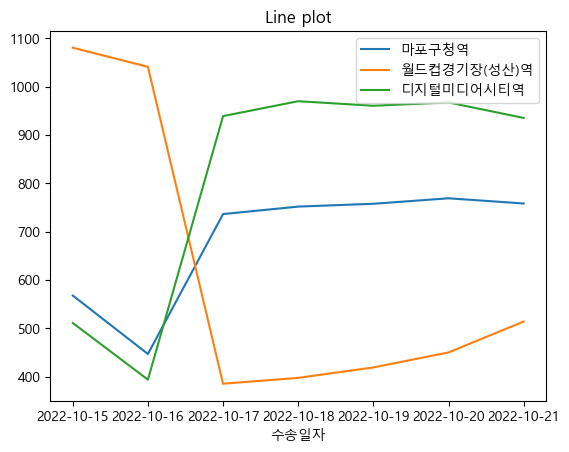

In [ ]:
# 축제기간 동안의 축제 개최지 근처 역 (3개의 전철역) 하루평균 승객수 산점도

data1521.plot.line(title='Line plot')

월드컵경기장만 주말에 급격하게 사람이 많아졌고 다른 곳은 평일 승객 수가 더 많음

 -> 축제기간이 아닌 날의 승객수를 한번 구해보자.

In [ ]:
# 축제기간 전 주인 10월 8일 ~ 10월 14일

subway08_14 = subway_time.loc['2022-10-08':'2022-10-14']

In [ ]:
# 마포구청역

subway_mapo = subway08_14[subway08_14['역명'] == '마포구청']
mapo = subway_mapo[subway_mapo['승하차구분'] == '하차']
s_ma1 = mapo.loc[:,'하루평균승객수']
s_ma1

수송일자
2022-10-08    533.684211
2022-10-09    336.789474
2022-10-10    370.473684
2022-10-11    743.473684
2022-10-12    754.894737
2022-10-13    781.947368
2022-10-14    796.789474
Name: 하루평균승객수, dtype: float64

In [ ]:
# 월드컵경기장(성산)역

subway_world = subway08_14[subway08_14['역명'] == '월드컵경기장(성산)']
world = subway_world[subway_world['승하차구분'] == '하차']
s_wo1 = world.loc[:,'하루평균승객수']
s_wo1

수송일자
2022-10-08    639.684211
2022-10-09    196.105263
2022-10-10    307.263158
2022-10-11    328.894737
2022-10-12    448.105263
2022-10-13    379.631579
2022-10-14    566.526316
Name: 하루평균승객수, dtype: float64

In [ ]:
# 디지털미디어시티역

subway_digi = subway08_14[subway08_14['역명'] == '디지털미디어시티']
digi = subway_digi[subway_digi['승하차구분'] == '하차']
s_di1 = digi.loc[:,'하루평균승객수']
s_di1

수송일자
2022-10-08    514.894737
2022-10-09    306.842105
2022-10-10    357.789474
2022-10-11    949.684211
2022-10-12    972.526316
2022-10-13    972.736842
2022-10-14    949.421053
Name: 하루평균승객수, dtype: float64

In [ ]:
data814 = {"마포구청역" : s_ma1, "월드컵경기장(성산)역" : s_wo1, "디지털미디어시티역" : s_di1 }
data814 = pd.DataFrame(data814)
data814

,마포구청역,월드컵경기장(성산)역,디지털미디어시티역
수송일자,,,
2022-10-08,533.684211,639.684211,514.894737
2022-10-09,336.789474,196.105263,306.842105
2022-10-10,370.473684,307.263158,357.789474
2022-10-11,743.473684,328.894737,949.684211
2022-10-12,754.894737,448.105263,972.526316
2022-10-13,781.947368,379.631579,972.736842
2022-10-14,796.789474,566.526316,949.421053


<AxesSubplot:xlabel='수송일자'>

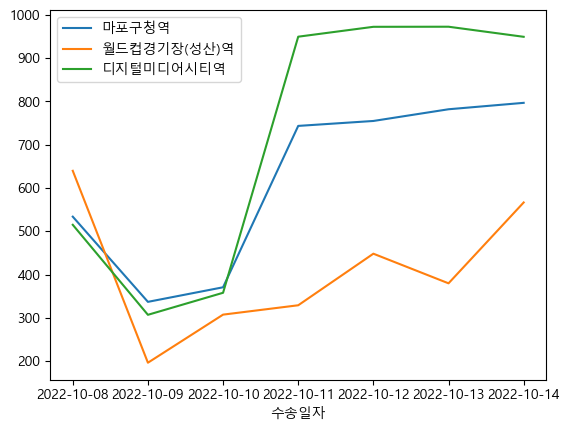

In [ ]:
# 축제기간이 아닌 (10.08 ~ 10.14) 동안의 축제 개최지 근처 역 (3개의 전철역) 하루평균 승객수 산점도

data814.plot.line()

In [ ]:
# 축제가 끝난 주 10월 22일 ~ 10월 28일
subway22_28 = subway_time.loc['2022-10-22':'2022-10-28']

In [ ]:
# 마포구청역

subway_mapo = subway22_28[subway22_28['역명'] == '마포구청']
mapo = subway_mapo[subway_mapo['승하차구분'] == '하차']
s_ma2 = mapo.loc[:,'하루평균승객수']
s_ma2

수송일자
2022-10-22    525.263158
2022-10-23    388.789474
2022-10-24    743.315789
2022-10-25    763.421053
2022-10-26    756.789474
2022-10-27    764.789474
2022-10-28    771.631579
Name: 하루평균승객수, dtype: float64

In [ ]:
# 월드컵경기장(성산)역

subway_world =subway22_28[subway22_28['역명'] == '월드컵경기장(성산)']
world = subway_world[subway_world['승하차구분'] == '하차']
s_wo2= world.loc[:,'하루평균승객수']
s_wo2

수송일자
2022-10-22    792.157895
2022-10-23    584.052632
2022-10-24    361.368421
2022-10-25    386.105263
2022-10-26    382.736842
2022-10-27    760.263158
2022-10-28    407.315789
Name: 하루평균승객수, dtype: float64

In [ ]:
# 디지털미디어 시티역

subway_digi = subway22_28[subway22_28['역명'] == '디지털미디어시티']
digi = subway_digi[subway_digi['승하차구분'] == '하차']
s_di2 = digi.loc[:,'하루평균승객수']
s_di2

수송일자
2022-10-22    510.210526
2022-10-23    365.947368
2022-10-24    928.473684
2022-10-25    954.473684
2022-10-26    969.263158
2022-10-27    973.421053
2022-10-28    942.105263
Name: 하루평균승객수, dtype: float64

In [ ]:
data2228 = {"마포구청역" : s_ma2, "월드컵경기장(성산)역" : s_wo2, "디지털미디어시티역" : s_di2 }
data2228 = pd.DataFrame(data2228)
data2228

,마포구청역,월드컵경기장(성산)역,디지털미디어시티역
수송일자,,,
2022-10-22,525.263158,792.157895,510.210526
2022-10-23,388.789474,584.052632,365.947368
2022-10-24,743.315789,361.368421,928.473684
2022-10-25,763.421053,386.105263,954.473684
2022-10-26,756.789474,382.736842,969.263158
2022-10-27,764.789474,760.263158,973.421053
2022-10-28,771.631579,407.315789,942.105263


<AxesSubplot:xlabel='수송일자'>

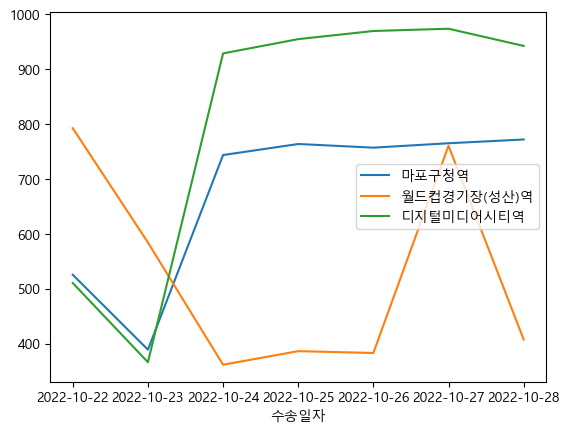

In [ ]:
# 축제기간이 아닌 (10.22 ~ 10.28) 동안의 축제 개최지 근처 역 (3개의 전철역) 하루평균 승객수 산점도

data2228.plot.line()



-> 가장 차이를 많이 보이는 월드컵경기장(성산)역을 더 분석

In [ ]:
world = {"축제 이전 일주일" : s_wo1, "축제 기간" : s_wo, "축제 이후 일주일" : s_wo2 }
world = pd.DataFrame(world)
# melt는 모든 값을 단일 열로 만들고 원래 열 레이블은 다른 열에 두려면 기본 설정 매개변수 값을 사용해 .melt를 호출하면 된다.
world.melt().dropna()

,variable,value
0,축제 이전 일주일,639.684211
1,축제 이전 일주일,196.105263
2,축제 이전 일주일,307.263158
3,축제 이전 일주일,328.894737
4,축제 이전 일주일,448.105263
5,축제 이전 일주일,379.631579
6,축제 이전 일주일,566.526316
28,축제 기간,1080.157895
29,축제 기간,1040.684211
30,축제 기간,385.842105


<AxesSubplot:xlabel='수송일자'>

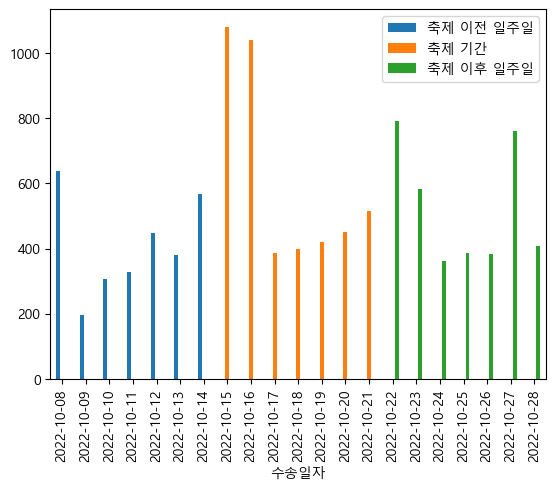

In [ ]:
#축제기간 , 그리고 축제기간 전후로 가장 많은 변화를 보인 월드컴경기장(성산)역만 따로 분석함

world.plot(kind='bar')

# 결론 & 시사점 ✅

분석 전 예상 결과

- 축제 기간 동안의 전철 하차 승객수와 축제 기간이 아닌 기간의 하차 승객수가 확연히 차이가 많이 날 것이다.
 - ( 축제 기간의 승객수 >>> 축제가 아닌 기간의 승객수)

- 축제 개최지와 거리가 더 가까운 전철역일 수록 더 많은 승객이 하차할 것이다.

- 축제 기간 동안에는 개최지와 가까운 전철역의 승객수가 요일에 상관없이 항상 많을 것이다.


분석 후 결과

- 축제 기간에 가장 많은 인구가 이용한 '월드컵 경기장' 막대 그래프를 보면 주말에는 확실히 하차 승객수가 증가했지만, 평일 이용객 수를 보면 축제기간의 수,목,금요일 하차 승객수가 축제가 아닌 기간의 수,목,금요일의 이용 승객수보다 적음.
▶ 축제라고 모든 날, 개최지 근처 전철역의 이용객 수가 증가하는 것이 아님

- 서울 억새 축제 개최지와 가장 가까운 역인 '월드컵 경기장역'의 전철 하차 승객수가 '마포구청역', '디지털미디어시티역'의 승객수보다 일요일에는 2배, 토요일에는 600명 정도가 차이나지만, 오히려 축제 기간의 평일 모든 날의 승객수는 월드컵 경기장 평균 하차 승객 수가 300명대에서 500명대로 개최 장소 근처 역 중에서 하루 평균 가장 적은 인구가 하차했음을 알 수 있음




---



☝ 2022년도 서울 억새 축제와 2022년도 전철 승객수 분석을 통해 2023년 10월에 개최될 서울 억새축제 개최지 근처 전철역 혼잡도 예상 가능

▶ 축제 방문 계획에 도움 / 축제 홍보에 도움 / 혼잡도 방지 가능

더 나아가 이와 같은 분석을 활용하면 미래에 개최될 다양한 다른 축제들의 근처 전철역 혼잡도도 예상할 수 있음
